In [2]:
!tar -xvzf '/content/drive/MyDrive/NER social Bias/SBIC.v2.tgz' -C '/content/drive/MyDrive/NER social Bias/'


LICENSE
README.md
SBIC.v2.agg.dev.csv
SBIC.v2.agg.trn.csv
SBIC.v2.agg.tst.csv
SBIC.v2.dev.csv
SBIC.v2.trn.csv
SBIC.v2.tst.csv


In [1]:
import pandas as pd

# Load the training dataset
train_agg_path = '/content/drive/MyDrive/NER social Bias/SBIC.v2.agg.trn.csv'
train_agg_data = pd.read_csv(train_agg_path)

# Display the first few rows of the dataset to understand its structure
train_agg_data.head()


,Unnamed: 0,post,targetMinority,targetCategory,targetStereotype,whoTarget,intentYN,sexYN,offensiveYN,dataSource,hasBiasedImplication
0,0,"\n\nBill Kristol and Ben Shaprio, two turds in...",[],[],[],0.0,0.886667,0.0,1.000000,Gab,1
1,1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,[],[],[],NaN,0.220000,0.0,0.000000,Gab,1
2,2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,"[""liberals""]","[""social""]","[""miscontrue things"", ""take things in a weird ...",1.0,1.000000,0.0,1.000000,Gab,0
3,3,\nDavid Knight‏ \n\nNotice how quickly things ...,[],[],[],0.0,0.110000,0.0,0.166667,Gab,1
4,4,\nFinland fireball: Time-lapse video shows nig...,[],[],[],NaN,0.000000,0.0,0.000000,Gab,1


In [54]:
import pandas as pd

# Load the training dataset
train_agg_path = '/content/drive/MyDrive/NER social Bias/SBIC.v2.agg.trn.csv'
train_agg_data = pd.read_csv(train_agg_path)

# Display the first few rows of the dataset to understand its structure
train_agg_data.head()


,Unnamed: 0,post,targetMinority,targetCategory,targetStereotype,whoTarget,intentYN,sexYN,offensiveYN,dataSource,hasBiasedImplication
0,0,"\n\nBill Kristol and Ben Shaprio, two turds in...",[],[],[],0.0,0.886667,0.0,1.000000,Gab,1
1,1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,[],[],[],NaN,0.220000,0.0,0.000000,Gab,1
2,2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,"[""liberals""]","[""social""]","[""miscontrue things"", ""take things in a weird ...",1.0,1.000000,0.0,1.000000,Gab,0
3,3,\nDavid Knight‏ \n\nNotice how quickly things ...,[],[],[],0.0,0.110000,0.0,0.166667,Gab,1
4,4,\nFinland fireball: Time-lapse video shows nig...,[],[],[],NaN,0.000000,0.0,0.000000,Gab,1


In [55]:
# Get the column names
column_names = train_agg_data.columns

# Display the column names
print(column_names)


Index(['Unnamed: 0', 'post', 'targetMinority', 'targetCategory',
       'targetStereotype', 'whoTarget', 'intentYN', 'sexYN', 'offensiveYN',
       'dataSource', 'hasBiasedImplication'],
      dtype='object')


In [56]:
# Extract 'post' and 'targetCategory' columns
extracted_data = train_agg_data[['post', 'targetCategory']]

# Display the first few rows of the extracted data
extracted_data.head()


,post,targetCategory
0,"\n\nBill Kristol and Ben Shaprio, two turds in...",[]
1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,[]
2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,"[""social""]"
3,\nDavid Knight‏ \n\nNotice how quickly things ...,[]
4,\nFinland fireball: Time-lapse video shows nig...,[]


In [57]:
import re
import string

# Define a function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Optionally, remove stopwords (this step requires NLTK or another library)
    # text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Apply the cleaning function to the 'post' column
extracted_data['cleaned_post'] = extracted_data['post'].apply(clean_text)

# Display the first few rows of the cleaned data
extracted_data[['post', 'cleaned_post']].head()


<ipython-input-57-2ff36156983b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['cleaned_post'] = extracted_data['post'].apply(clean_text)


,post,cleaned_post
0,"\n\nBill Kristol and Ben Shaprio, two turds in...",\n\nbill kristol and ben shaprio two turds in ...
1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,\n\nrose\ntaylor realrosetaylor h hours ago\n\...
2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,\ncharlie kirk\n\njohnny depp calls for death ...
3,\nDavid Knight‏ \n\nNotice how quickly things ...,\ndavid knight \n\nnotice how quickly things t...
4,\nFinland fireball: Time-lapse video shows nig...,\nfinland fireball timelapse video shows night...


In [58]:
# Function to clean targetCategory column
def clean_category(text):
    # Remove [] and ''
    cleaned_text = text.replace("[", "").replace("]", "").replace("'", "").strip()
    return cleaned_text

# Apply the cleaning function to the 'targetCategory' column
extracted_data['cleaned_targetCategory'] = extracted_data['targetCategory'].apply(clean_category)

# Display the first few rows of the cleaned data
extracted_data[['targetCategory', 'cleaned_targetCategory']].head()


<ipython-input-58-df5a58bb939b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['cleaned_targetCategory'] = extracted_data['targetCategory'].apply(clean_category)


,targetCategory,cleaned_targetCategory
0,[],
1,[],
2,"[""social""]","""social"""
3,[],
4,[],


In [59]:
# Update function to clean targetCategory column
def clean_category(text):
    # Remove [], '', and ""
    cleaned_text = text.replace("[", "").replace("]", "").replace("'", "").replace('"', '').strip()
    return cleaned_text

# Apply the updated cleaning function to the 'targetCategory' column
extracted_data['cleaned_targetCategory'] = extracted_data['targetCategory'].apply(clean_category)

# Display the first few rows of the cleaned data
extracted_data[['targetCategory', 'cleaned_targetCategory']].head()


<ipython-input-59-bfa9f58d2107>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['cleaned_targetCategory'] = extracted_data['targetCategory'].apply(clean_category)


,targetCategory,cleaned_targetCategory
0,[],
1,[],
2,"[""social""]",social
3,[],
4,[],


In [60]:
# Create a new dataframe with cleaned columns
cleaned_df = extracted_data[['cleaned_post', 'cleaned_targetCategory']]

# Optionally, rename the columns for clarity
cleaned_df.columns = ['post', 'targetCategory']

# Save the new dataframe to a CSV file
cleaned_df_path = '/content/drive/MyDrive/NER social Bias/cleaned_data.csv'
cleaned_df.to_csv(cleaned_df_path, index=False)


In [61]:
# Check for null values in the cleaned_df
null_counts = cleaned_df.isnull().sum()

# Display the counts of null values for each column
print(null_counts)


post              0
targetCategory    0
dtype: int64


In [62]:
# Check for empty strings in the post column
empty_posts = cleaned_df[cleaned_df['post'] == ''].shape[0]

# Check for empty strings in the targetCategory column
empty_targetCategory = cleaned_df[cleaned_df['targetCategory'] == ''].shape[0]

print(f"Number of empty strings in post: {empty_posts}")
print(f"Number of empty strings in targetCategory: {empty_targetCategory}")


Number of empty strings in post: 0
Number of empty strings in targetCategory: 23295


In [63]:
# Filter out rows where 'targetCategory' is an empty string
cleaned_df = cleaned_df[cleaned_df['targetCategory'] != '']

# Display the shape of the dataframe after removal
print(cleaned_df.shape)


(12129, 2)


In [64]:
# Check for empty strings in the post column
empty_posts = cleaned_df[cleaned_df['post'] == ''].shape[0]

# Check for empty strings in the targetCategory column
empty_targetCategory = cleaned_df[cleaned_df['targetCategory'] == ''].shape[0]

print(f"Number of empty strings in post: {empty_posts}")
print(f"Number of empty strings in targetCategory: {empty_targetCategory}")


Number of empty strings in post: 0
Number of empty strings in targetCategory: 0


In [66]:
unique_combinations = cleaned_df['targetCategory'].unique()

# Print the unique combinations
for combo in unique_combinations:
    print(combo)


social
culture
culture, gender
gender
disabled
race
victim
gender, race
body
culture, race
culture, social
gender, victim
disabled, race
race, victim
race, social
gender, social
culture, victim
body, gender
culture, disabled
body, race
culture, race, victim
disabled, gender
social, victim
gender, race, victim
body, culture
body, disabled
body, victim
disabled, victim
culture, gender, victim
body, culture, race
body, social
culture, disabled, race
race, social, victim
disabled, gender, victim
disabled, social
culture, gender, race
body, gender, victim
disabled, gender, race
gender, race, social
gender, social, victim
culture, gender, social
culture, race, social
body, gender, social
culture, gender, race, social
culture, social, victim
body, gender, race
body, disabled, race
culture, disabled, victim
body, disabled, social


In [67]:
# Get counts for each unique combination in 'targetCategory'
category_counts = cleaned_df['targetCategory'].value_counts()

# Display the counts
print(category_counts)


race                             3171
gender                           2999
culture                          1639
victim                           1352
disabled                          652
social                            467
culture, race                     374
culture, victim                   314
body                              298
gender, victim                    169
gender, race                      167
body, victim                       58
race, victim                       57
gender, social                     55
body, gender                       47
race, social                       41
culture, social                    40
culture, gender                    40
disabled, gender                   26
culture, race, victim              22
disabled, victim                   21
disabled, race                     15
body, disabled                     13
social, victim                     11
body, race                          9
culture, gender, race               9
culture, dis

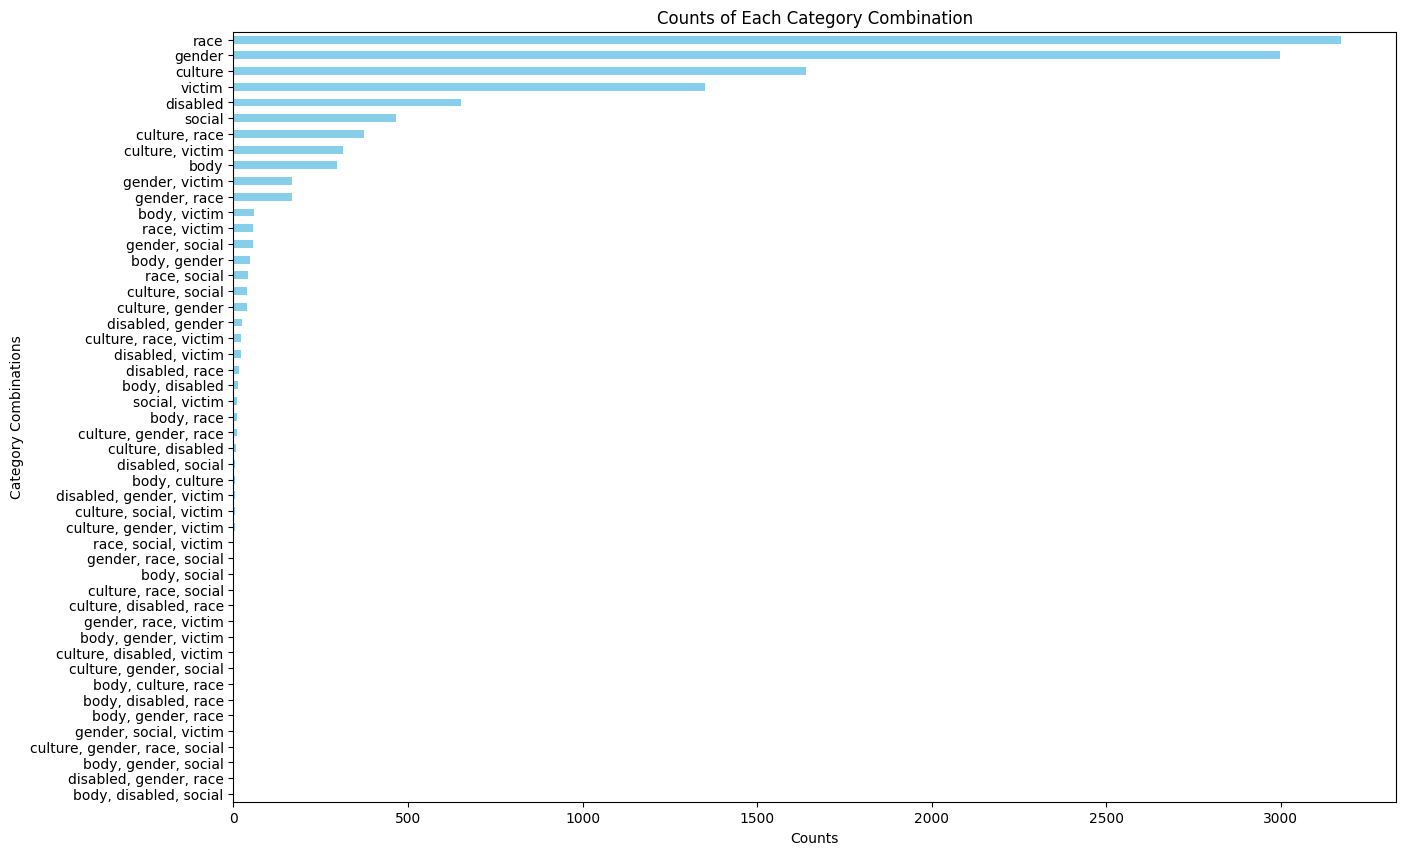

In [68]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(15, 10))
category_counts.plot(kind='barh', color='skyblue')

# Set title and labels
plt.title('Counts of Each Category Combination')
plt.xlabel('Counts')
plt.ylabel('Category Combinations')
plt.gca().invert_yaxis()  # This will display the category with the highest count at the top

# Display the plot
plt.show()


In [69]:
# Define a list of the selected categories
selected_categories = ['race', 'gender', 'culture', 'victim']

# Filter the dataframe to only include the selected categories
filtered_df = cleaned_df[cleaned_df['targetCategory'].isin(selected_categories)]

# Check the shape of the filtered dataframe
print(filtered_df.shape)


(9161, 2)


In [70]:
# Separate the dataframes for race and gender
race_df = filtered_df[filtered_df['targetCategory'] == 'race']
gender_df = filtered_df[filtered_df['targetCategory'] == 'gender']

# Downsample
race_downsampled = race_df.sample(n=1500, random_state=42)
gender_downsampled = gender_df.sample(n=1500, random_state=42)

# Combine the downsampled dataframes with the other categories
balanced_df = pd.concat([race_downsampled, gender_downsampled,
                         filtered_df[filtered_df['targetCategory'] == 'culture'],
                         filtered_df[filtered_df['targetCategory'] == 'victim']])

# Shuffle the rows of the dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shape of the balanced dataframe
print(balanced_df.shape)

# Check the counts for each category in the balanced dataset
print(balanced_df['targetCategory'].value_counts())


(5991, 2)
culture    1639
gender     1500
race       1500
victim     1352
Name: targetCategory, dtype: int64


In [71]:
balanced_df.to_csv('/content/drive/MyDrive/NER social Bias/balanced_data.csv', index=False)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the dataset into training and test sets
X = balanced_df['post']
y = balanced_df['targetCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tf, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_tf)

# Evaluate the model's performance
print(classification_report(y_test, y_pred, target_names=['race', 'gender', 'culture', 'victim']))


              precision    recall  f1-score   support

        race       0.73      0.79      0.76       321
      gender       0.77      0.80      0.78       300
     culture       0.79      0.84      0.81       296
      victim       0.81      0.65      0.72       282

    accuracy                           0.77      1199
   macro avg       0.78      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199



In [73]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC

# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def encode_texts(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='tf')

# Prepare dataset
X = balanced_df['post'].tolist()
y = pd.get_dummies(balanced_df['targetCategory']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = encode_texts(X_train)
test_dataset = encode_texts(X_test)

# Model setup
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y.shape[1])
optimizer = Adam(learning_rate=5e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Metrics
metrics = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc')
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

callbacks = [early_stopping, model_checkpoint]

# Training
history = model.fit(
    train_dataset['input_ids'], y_train,
    validation_data=(test_dataset['input_ids'], y_test),
    batch_size=16,
    epochs=30,
    callbacks=callbacks
)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/30
300/300 [==============================] - 115s 292ms/step - loss: 0.6231 - accuracy: 0.7769 - precision: 0.7591 - recall: 0.7761 - auc: 0.8899 - val_loss: 0.4082 - val_accuracy: 0.8649 - val_precision: 0.7884 - val_recall: 0.9074 - val_auc: 0.9352
Epoch 2/30
300/300 [==============================] - 73s 243ms/step - loss: 0.3457 - accuracy: 0.8829 - precision: 0.8035 - recall: 0.9307 - auc: 0.9469 - val_loss: 0.3997 - val_accuracy: 0.8699 - val_precision: 0.7456 - val_recall: 0.9141 - val_auc: 0.9343
Epoch 3/30
300/300 [==============================] - 75s 251ms/step - loss: 0.2180 - accuracy: 0.9270 - precision: 0.8333 - recall: 0.9662 - auc: 0.9682 - val_loss: 0.4423 - val_accuracy: 0.8741 - val_precision: 0.7757 - val_recall: 0.9174 - val_auc: 0.9303
Epoch 4/30
300/300 [==============================] - 75s 249ms/step - loss: 0.1491 - accuracy: 0.9551 - precision: 0.8630 - recall: 0.9804 - auc: 0.9774 - val_loss: 0.4548 - val_accuracy: 0.8657 - val_precision: 0.7402 - 

In [82]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import random

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y.shape[1])
model.load_weights('/content/best_weights.h5')

# Select a random sentence from the test data
index = random.randint(0, len(X_test) - 1)
random_sentence = X_test[index]

# Predict using the model
inputs = encode_texts([random_sentence])
outputs = model.predict(inputs['input_ids'])
predicted_category_index = np.argmax(outputs.logits)
predicted_category = balanced_df['targetCategory'].unique()[predicted_category_index]
actual_category = balanced_df['targetCategory'][index]

# Display the results
print("Sentence:", random_sentence)
print("Actual Category:", actual_category)
print("Predicted Category:", predicted_category)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

1/1 [==============================] - 2s 2s/step
Sentence: how do you tit wank a  year old break her shoulders
Actual Category: victim
Predicted Category: victim


In [83]:
final_precision = history.history['val_precision'][-1]
final_recall = history.history['val_recall'][-1]

print(f"Final Validation Precision: {final_precision:.4f}")
print(f"Final Validation Recall: {final_recall:.4f}")


Final Validation Precision: 0.7585
Final Validation Recall: 0.9166


In [84]:
final_f1 = 2 * (final_precision * final_recall) / (final_precision + final_recall)
print(f"Final Validation F1-score: {final_f1:.4f}")


Final Validation F1-score: 0.8301
